In [1]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dropbox_dir = "/Users/kendraziegler/Dropbox (Palmer Lab)"

#dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [3]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
cohorts_dir = ['Shipment1_locomotor',
               'Shipment2_locomotor',
               'Shipment3_locomotor',
               'Shipment4_locomotor',
               'Shipment5_locomotor',
               'Shipment6_locomotor']
               #'ShipR_locomotor']

zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/',
              'U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/',
              'comprehensive_output_files/comprehensive_output_files/',
              'comprehensive-output-files/',
              'Ship6-comprehensive-output-files/S6-comprehensive-out-files/']
              #'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                #print(file)
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
#print(count)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,AMBULATORY ACTIVITY COUNT,AMBULATORY EPISODE AVERAGE VELOCITY (cm/s),AMBULATORY EPISODE COUNT,AMBULATORY EPISODE MEDIAN VELOCITY (cm/s),AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s),AMBULATORY TIME (s),BATCH,CAGE,CENTER DISTANCE LEGACY (cm),CENTER TIME LEGACY (s),...,SUBJECT SEX,SUBJECT TREATMENT,SUBJECT TYPE,TOTAL DISTANCE (cm),TOTAL DISTANCE X-AXIS (cm),TOTAL DISTANCE Y-AXIS (cm),Unnamed: 44,VERTICAL ACTIVITY COUNT,VERTICAL ACTIVITY TIME (s),VERTICAL EPISODE COUNT
0,545,12.80,1,14.31,28.33,6.11,Batch 1,Cage 1,131.26,24.49,...,Unknown,NaN,9-black,231.98,75.88,80.33,NaN,131,51.08,5
1,495,13.20,0,19.68,18.69,6.88,Batch 1,Cage 1,103.79,12.65,...,Unknown,NaN,9-black,256.13,70.17,107.95,NaN,121,54.89,4
2,579,12.79,0,16.80,19.75,7.33,Batch 1,Cage 1,204.45,24.62,...,Unknown,NaN,9-black,332.35,157.80,113.67,NaN,141,55.52,3
3,305,12.30,0,16.07,36.77,4.43,Batch 1,Cage 1,114.53,19.66,...,Unknown,NaN,9-black,176.24,79.38,44.77,NaN,106,53.44,5
4,419,8.38,0,10.51,17.83,8.45,Batch 1,Cage 1,153.27,21.35,...,Unknown,NaN,9-black,230.01,115.25,71.76,NaN,126,54.23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,190,10.02,3,10.06,23.30,4.03,Batch 1,Cage 4,46.24,11.52,...,Unknown,NaN,34-mixed/brown,109.06,63.18,26.67,NaN,65,45.61,9
21011,286,10.94,5,15.19,23.62,2.82,Batch 1,Cage 4,67.05,20.42,...,Unknown,NaN,34-mixed/brown,154.36,36.51,93.66,NaN,93,45.02,8
21012,106,7.51,0,5.82,18.08,1.83,Batch 1,Cage 4,11.63,2.19,...,Unknown,NaN,34-mixed/brown,56.14,38.42,15.24,NaN,16,17.50,9
21013,4,0.00,0,0.00,0.00,0.00,Batch 1,Cage 4,0.00,0.00,...,Unknown,NaN,34-mixed/brown,0.00,0.00,0.00,NaN,1,1.94,5


In [4]:
print(list(df_csv.columns))

['AMBULATORY ACTIVITY COUNT', 'AMBULATORY EPISODE AVERAGE VELOCITY (cm/s)', 'AMBULATORY EPISODE COUNT', 'AMBULATORY EPISODE MEDIAN VELOCITY (cm/s)', 'AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s)', 'AMBULATORY TIME (s)', 'BATCH', 'CAGE', 'CENTER DISTANCE LEGACY (cm)', 'CENTER TIME LEGACY (s)', 'CLOCKWISE REVOLUTIONS', 'COUNTER-CLOCKWISE REVOLUTIONS', 'DURATION (s)', 'EXPERIMENT', 'HORIZONTAL ACTIVITY COUNT', 'JUMP COUNT', 'LEFT-FRONT TIME LEGACY (s)', 'LEFT-REAR TIME LEGACY (s)', 'MARGIN DISTANCE LEGACY (cm)', 'MARGIN TIME LEGACY (s)', 'MOVEMENT EPISODE COUNT', 'MOVEMENT TIME (s)', 'PHASE', 'REST EPISODE COUNT', 'REST TIME (s)', 'RIGHT-FRONT TIME LEGACY (s)', 'RIGHT-REAR TIME LEGACY (s)', 'SAMPLE', 'START TIME', 'STEREOTYPIC ACTIVITY COUNT', 'STEREOTYPIC EPISODE ACTIVITY COUNT', 'STEREOTYPIC EPISODE COUNT', 'STEREOTYPY TIME (s)', 'SUBJECT AGE', 'SUBJECT ID', 'SUBJECT SEX', 'SUBJECT TREATMENT', 'SUBJECT TYPE', 'TOTAL DISTANCE (cm)', 'TOTAL DISTANCE X-AXIS (cm)', 'TOTAL DISTANCE Y-AXIS

In [5]:
def format_df_csv():
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    

        
        

format_df_csv()
df_csv

,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,stereotypy_time,subject_age,rfid,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,1.48,11,46179,9-black,231.98,75.88,80.33,131,51.08,5
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,1.69,11,46179,9-black,256.13,70.17,107.95,121,54.89,4
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,1.62,11,46179,9-black,332.35,157.80,113.67,141,55.52,3
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,2.14,11,46179,9-black,176.24,79.38,44.77,106,53.44,5
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,4.69,11,46179,9-black,230.01,115.25,71.76,126,54.23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,190,10.02,3,10.06,23.30,4.03,Cage 4,46.24,11.52,0,...,5.83,12,87382,34-mixed/brown,109.06,63.18,26.67,65,45.61,9
21011,286,10.94,5,15.19,23.62,2.82,Cage 4,67.05,20.42,0,...,1.13,12,87382,34-mixed/brown,154.36,36.51,93.66,93,45.02,8
21012,106,7.51,0,5.82,18.08,1.83,Cage 4,11.63,2.19,2,...,0.72,12,87382,34-mixed/brown,56.14,38.42,15.24,16,17.50,9
21013,4,0.00,0,0.00,0.00,0.00,Cage 4,0.00,0.00,0,...,0.06,12,87382,34-mixed/brown,0.00,0.00,0.00,1,1.94,5


In [6]:
#Load in master sheet in order to get the cohort value
#dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
dropbox_dir = r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'

df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')
df_wfu['rfid'] = df_wfu['rfid'].astype(str)
df_wfu['last_5'] = df_wfu['rfid'].str.replace('9330003200','')
df_wfu['last_5'] = df_wfu['last_5'].str.replace('9330003201','')
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


In [7]:
#Take the cohort value from the wfu and map it to the locomotor df
def locomotor_cohort(df_csv):
    #create an empty column for cohort for the locomotor df
    df_csv["cohort"] = np.nan

    #loop through each rfid in wfu master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the cohort of the rfid
        b = df_wfu.iloc[a]['cohort']
        #find all the indeces that have that rfid in locomotor df
        c = df_csv.loc[df_csv['rfid'] == i].index.tolist()
        #loop through each index
        #for index in c:
            #set the cohort value at that index equal to the cohort from wfu_master
            #df_csv.loc[index,'cohort'] = b
        df_csv.loc[df_csv['rfid'] == i,'cohort'] = b

        
locomotor_cohort(df_csv)
df_csv

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,subject_age,rfid,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count,cohort
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,11,46179,9-black,231.98,75.88,80.33,131,51.08,5,NaN
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,11,46179,9-black,256.13,70.17,107.95,121,54.89,4,NaN
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,11,46179,9-black,332.35,157.80,113.67,141,55.52,3,NaN
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,11,46179,9-black,176.24,79.38,44.77,106,53.44,5,NaN
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,11,46179,9-black,230.01,115.25,71.76,126,54.23,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,190,10.02,3,10.06,23.30,4.03,Cage 4,46.24,11.52,0,...,12,87382,34-mixed/brown,109.06,63.18,26.67,65,45.61,9,NaN
21011,286,10.94,5,15.19,23.62,2.82,Cage 4,67.05,20.42,0,...,12,87382,34-mixed/brown,154.36,36.51,93.66,93,45.02,8,NaN
21012,106,7.51,0,5.82,18.08,1.83,Cage 4,11.63,2.19,2,...,12,87382,34-mixed/brown,56.14,38.42,15.24,16,17.50,9,NaN
21013,4,0.00,0,0.00,0.00,0.00,Cage 4,0.00,0.00,0,...,12,87382,34-mixed/brown,0.00,0.00,0.00,1,1.94,5,NaN


In [8]:
#Take the sex value from the wfu and map it to the locomotor df
def locomotor_sex(df_csv):
    #create an empty column for sex for the locomotor df
    df_csv["sex"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['sex']
        #find all the indeces that have that rfid in locomotor df and update sex
        df_csv.loc[df_csv['rfid'] == i,'sex'] = b

        
locomotor_sex(df_csv)
df_csv

,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,rfid,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count,cohort,sex
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,46179,9-black,231.98,75.88,80.33,131,51.08,5,NaN,NaN
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,46179,9-black,256.13,70.17,107.95,121,54.89,4,NaN,NaN
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,46179,9-black,332.35,157.80,113.67,141,55.52,3,NaN,NaN
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,46179,9-black,176.24,79.38,44.77,106,53.44,5,NaN,NaN
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,46179,9-black,230.01,115.25,71.76,126,54.23,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,190,10.02,3,10.06,23.30,4.03,Cage 4,46.24,11.52,0,...,87382,34-mixed/brown,109.06,63.18,26.67,65,45.61,9,NaN,NaN
21011,286,10.94,5,15.19,23.62,2.82,Cage 4,67.05,20.42,0,...,87382,34-mixed/brown,154.36,36.51,93.66,93,45.02,8,NaN,NaN
21012,106,7.51,0,5.82,18.08,1.83,Cage 4,11.63,2.19,2,...,87382,34-mixed/brown,56.14,38.42,15.24,16,17.50,9,NaN,NaN
21013,4,0.00,0,0.00,0.00,0.00,Cage 4,0.00,0.00,0,...,87382,34-mixed/brown,0.00,0.00,0.00,1,1.94,5,NaN,NaN


In [9]:
#Take the coat color value from the wfu and map it to the locomotor df
def locomotor_coatcolor(df_csv):
    #create an empty column for coat color for the locomotor df
    df_csv["coatcolor"] = np.nan

    #loop through each rfid in master table
    for i in df_wfu['last_5']:
        #find the index of the rfid
        a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
        #find the sex of the rfid
        b = df_wfu.iloc[a]['coatcolor']
        #find all the indeces that have that rfid in locomotor df and update sex
        df_csv.loc[df_csv['rfid'] == i,'coatcolor'] = b

locomotor_coatcolor(df_csv)
df_csv

,ambulatory_activity_count,ambulatory_episode_average_velocity,ambulatory_episode_count,ambulatory_episode_median_velocity,ambulatory_episode_peak_average_velocity,ambulatory_time,cage,center_distance_legacy,center_time_legacy,clockwise_revolutions,...,subject_type,total_distance,total_distance_x,total_distance_y,vertical_activity_count,vertical_activity_time,vertical_episode_count,cohort,sex,coatcolor
0,545,12.80,1,14.31,28.33,6.11,Cage 1,131.26,24.49,0,...,9-black,231.98,75.88,80.33,131,51.08,5,NaN,NaN,NaN
1,495,13.20,0,19.68,18.69,6.88,Cage 1,103.79,12.65,0,...,9-black,256.13,70.17,107.95,121,54.89,4,NaN,NaN,NaN
2,579,12.79,0,16.80,19.75,7.33,Cage 1,204.45,24.62,4,...,9-black,332.35,157.80,113.67,141,55.52,3,NaN,NaN,NaN
3,305,12.30,0,16.07,36.77,4.43,Cage 1,114.53,19.66,0,...,9-black,176.24,79.38,44.77,106,53.44,5,NaN,NaN,NaN
4,419,8.38,0,10.51,17.83,8.45,Cage 1,153.27,21.35,1,...,9-black,230.01,115.25,71.76,126,54.23,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,190,10.02,3,10.06,23.30,4.03,Cage 4,46.24,11.52,0,...,34-mixed/brown,109.06,63.18,26.67,65,45.61,9,NaN,NaN,NaN
21011,286,10.94,5,15.19,23.62,2.82,Cage 4,67.05,20.42,0,...,34-mixed/brown,154.36,36.51,93.66,93,45.02,8,NaN,NaN,NaN
21012,106,7.51,0,5.82,18.08,1.83,Cage 4,11.63,2.19,2,...,34-mixed/brown,56.14,38.42,15.24,16,17.50,9,NaN,NaN,NaN
21013,4,0.00,0,0.00,0.00,0.00,Cage 4,0.00,0.00,0,...,34-mixed/brown,0.00,0.00,0.00,1,1.94,5,NaN,NaN,NaN


In [10]:
def correcting_rfid(df_csv):
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
    cohort_list_1 = ['C01','C02','C03','C04']
    cohort_list_2 = ['C05','C06','C07']
    for i in cohort_list_1:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003200' + df_csv['rfid'].astype(str)
    for i in cohort_list_2:
        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003201' + df_csv['rfid'].astype(str)
correcting_rfid(df_csv)
df_csv.rfid

0        46179
1        46179
2        46179
3        46179
4        46179
         ...  
21010    87382
21011    87382
21012    87382
21013    87382
21014    87382
Name: rfid, Length: 21015, dtype: object

In [11]:
#All error corrections

#Correct 4 file experiment names. 
#'U01-t2-gp21', 'U01-t2-gp22' to 'U01-t1-gp21', 'U01-t1-gp22'
#'U01-t2a-gp21', 'U01-t2a-gp22' to 'U01-t2-gp21', 'U01-t2-gp22'
def correct_experiment(df):
    old_name = ['U01-t2-gp21', 'U01-t2-gp22','U01-t2a-gp21', 'U01-t2a-gp22']
    new_name = ['U01-t1-gp21', 'U01-t1-gp22','U01-t2-gp21', 'U01-t2-gp22']
    for name in old_name: 
        index = old_name.index(name)
        df.loc[(df.experiment == name) & (df.cohort == 'C05'),'experiment'] = new_name[index]

#87713 is in C05 but cannot be found in wfu_master
#87713 is a typo and should be 87173
#missing_cohort = locomotor_all[locomotor_all['cohort'].isna()]
#locomotor_all[locomotor_all['rfid'] == '933000320187173']
def fix_rfid(df):
    df['rfid'] = df['rfid'].astype(str)
    df.loc[(df.rfid == '87713'),'rfid'] = '933000320187173'
    df.loc[(df.rfid == '933000320187173'),'cohort'] = 'C05'

#need to remove 933000320046763 from file U01-t2-gp13; rat had tail injury in first file
#file U01-t2-gp13-B contains the correct data for rat
#will remove 15 rows from table
def remove_incorrect(df):
    df.drop(df.loc[(df.experiment == 'U01-t2-gp13') & (df.rfid == '933000320046763')].index, inplace = True)
    df.loc[(df.experiment == 'U01-t2-gp13-B'),'experiment'] = 'U01-t2-gp13'
    
#There is no U01-t1-gp2 in C05. Assume U01-t1-gp2a is its replacement
def file_rename(df):
    df.loc[(df.experiment == 'U01-t1-gp2a'),'experiment'] = 'U01-t1-gp2'
    #extra_file = locomotor_all[locomotor_all['experiment'] == 'U01-t1-gp2a']
    
remove_incorrect(df_csv)
fix_rfid(df_csv)
correct_experiment(df_csv)
file_rename(df_csv)


In [12]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    #df['phase'] = df['phase'].str.replace('Phase ','')
    #split cell based on -
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]

splitting_cells(df_csv)
list(df_csv.columns.values)

['ambulatory_activity_count',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_count',
 'ambulatory_episode_median_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_time',
 'cage',
 'center_distance_legacy',
 'center_time_legacy',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'experiment',
 'horizontal_activity_count',
 'jump_count',
 'left-front_time_legacy',
 'left_rear_time_legacy',
 'margin_distance_legacy',
 'margin_time_legacy',
 'movement_episode_count',
 'movement_time',
 'phase',
 'rest_episode_count',
 'rest_time',
 'right_front_time_legacy',
 'right_rear_time_legacy',
 'sample',
 'start_time',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'stereotypic_episode_count',
 'stereotypy_time',
 'subject_age',
 'rfid',
 'subject_type',
 'total_distance',
 'total_distance_x',
 'total_distance_y',
 'vertical_activity_count',
 'vertical_activity_time',
 'vertical_episode_count',
 'cohort',
 'sex',
 'coatcolor',
 'U0

In [13]:
def format_for_calc(df_csv):
    #drop uneeded columns for calc
    df = df_csv.drop(['U01','subject_type','subject_age','phase','start_time'], axis=1)
    #reorganize columns
    df = df[['experiment', 'rfid','cohort', 'sex', 'time',
       'file_num', 'sample','cage', 'total_distance', 'total_distance_x',
       'total_distance_y', 'horizontal_activity_count',
       'ambulatory_activity_count', 'rest_time', 'rest_episode_count',
       'movement_time', 'movement_episode_count', 'ambulatory_time',
       'ambulatory_episode_count', 'stereotypy_time',
       'stereotypic_episode_count', 'stereotypic_activity_count',
       'stereotypic_episode_activity_count', 'vertical_episode_count',
       'vertical_activity_count', 'vertical_activity_time', 'jump_count',
       'clockwise_revolutions', 'counter_clockwise_revolutions',
       'ambulatory_episode_average_velocity',
       'ambulatory_episode_peak_average_velocity',
       'ambulatory_episode_median_velocity', 'left-front_time_legacy',
       'right_front_time_legacy', 'left_rear_time_legacy',
       'right_rear_time_legacy', 'margin_time_legacy', 'center_time_legacy',
       'margin_distance_legacy', 'center_distance_legacy']]
    #Drop rows that will not be used for calculations: C07, C06, t3, t4 according to Mitchell
    #some C07 file was messing with upload so whole cohort has been removed from upload
    #df.drop(df.loc[df['cohort']=='C07'].index, inplace=True)
    df.drop(df.loc[df['cohort']=='C06'].index, inplace=True)
    df.drop(df.loc[df['time']=='t3'].index, inplace=True)
    df.drop(df.loc[df['time']=='t4'].index, inplace=True)

    return df


locomotor = format_for_calc(df_csv)

In [14]:
#need to find where cohort 1 file U01-t2-gp6 is

In [15]:
locomotor

,experiment,rfid,cohort,sex,time,file_num,sample,cage,total_distance,total_distance_x,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp5,46179,NaN,NaN,t1,gp5,1,1,231.98,75.88,...,28.33,14.31,1.00,1.88,0.00,1.06,35.51,24.49,100.72,131.26
1,U01-t1-gp5,46179,NaN,NaN,t1,gp5,2,1,256.13,70.17,...,18.69,19.68,0.00,0.00,0.00,6.47,47.35,12.65,152.35,103.79
2,U01-t1-gp5,46179,NaN,NaN,t1,gp5,3,1,332.35,157.80,...,19.75,16.80,0.75,0.00,0.00,0.33,35.38,24.62,127.90,204.45
3,U01-t1-gp5,46179,NaN,NaN,t1,gp5,4,1,176.24,79.38,...,36.77,16.07,0.00,0.00,0.00,7.55,40.35,19.66,61.70,114.53
4,U01-t1-gp5,46179,NaN,NaN,t1,gp5,5,1,230.01,115.25,...,17.83,10.51,0.00,0.28,0.00,1.81,38.65,21.35,76.74,153.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21010,U01-t2-gp17,87382,NaN,NaN,t2,gp17,11,4,109.06,63.18,...,23.30,10.06,0.00,0.03,0.75,0.00,48.49,11.52,62.81,46.24
21011,U01-t2-gp17,87382,NaN,NaN,t2,gp17,12,4,154.36,36.51,...,23.62,15.19,0.52,0.00,0.00,2.42,39.58,20.42,87.31,67.05
21012,U01-t2-gp17,87382,NaN,NaN,t2,gp17,13,4,56.14,38.42,...,18.08,5.82,0.00,0.00,25.22,0.03,57.81,2.19,44.51,11.63
21013,U01-t2-gp17,87382,NaN,NaN,t2,gp17,14,4,0.00,0.00,...,0.00,0.00,0.00,0.00,59.91,0.00,60.00,0.00,0.00,0.00


In [16]:
def drop_unwanted(locomotor):
    locomotor = locomotor.drop(labels=[ 'total_distance_x',
 'total_distance_y',
 'horizontal_activity_count',
 'ambulatory_activity_count',
 'movement_time',
 'ambulatory_time',
 'ambulatory_episode_count',
 'stereotypy_time',
 'stereotypic_episode_count',
 'stereotypic_activity_count',
 'stereotypic_episode_activity_count',
 'vertical_episode_count',
 'vertical_activity_time',
 'jump_count',
 'clockwise_revolutions',
 'counter_clockwise_revolutions',
 'ambulatory_episode_average_velocity',
 'ambulatory_episode_peak_average_velocity',
 'ambulatory_episode_median_velocity',
 'left-front_time_legacy',
 'right_front_time_legacy',
 'left_rear_time_legacy',
 'right_rear_time_legacy',
 'margin_time_legacy',
 'margin_distance_legacy',
 'center_distance_legacy'], axis=1)
    return locomotor
    
locomotor = drop_unwanted(locomotor)
list(locomotor.columns.values)

['experiment',
 'rfid',
 'cohort',
 'sex',
 'time',
 'file_num',
 'sample',
 'cage',
 'total_distance',
 'rest_time',
 'rest_episode_count',
 'movement_episode_count',
 'vertical_activity_count',
 'center_time_legacy']

In [17]:
#df_csv.cohort.unique()
locomotor['cohort'].value_counts()

C05    15
Name: cohort, dtype: int64

In [18]:
locomotor['rfid'].value_counts()

46059              45
46763              45
48194              30
46274              30
48231              30
                   ..
87417              15
87414              15
87433              15
933000320187173    15
87415              15
Name: rfid, Length: 601, dtype: int64

In [19]:
#locomotor['experiment'].value_counts()

In [20]:
locomotor['rfid'].value_counts()
#last 4 are from missing c01 file; currently waiting on it from Mitchells team

46059              45
46763              45
48194              30
46274              30
48231              30
                   ..
87417              15
87414              15
87433              15
933000320187173    15
87415              15
Name: rfid, Length: 601, dtype: int64

In [21]:
locomotor_t1 = locomotor[locomotor.time == 't1']
locomotor_t1 = locomotor_t1.add_prefix('locomotor_t1_')
locomotor_t1.rename(columns={'locomotor_t1_rfid':'rfid','locomotor_t1_cohort':'cohort','locomotor_t1_sex':'sex',
                            'locomotor_t1_cage':'cage','locomotor_t1_sample':'sample'},inplace = True)
locomotor_t1
#locomotor_t1['rfid'].value_counts()


,locomotor_t1_experiment,rfid,cohort,sex,locomotor_t1_time,locomotor_t1_file_num,sample,cage,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy
0,U01-t1-gp5,46179,NaN,NaN,t1,gp5,1,1,231.98,5.13,4,5,131,24.49
1,U01-t1-gp5,46179,NaN,NaN,t1,gp5,2,1,256.13,6.10,5,6,121,12.65
2,U01-t1-gp5,46179,NaN,NaN,t1,gp5,3,1,332.35,3.64,3,4,141,24.62
3,U01-t1-gp5,46179,NaN,NaN,t1,gp5,4,1,176.24,15.63,8,9,106,19.66
4,U01-t1-gp5,46179,NaN,NaN,t1,gp5,5,1,230.01,6.02,3,4,126,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20950,U01-t1-gp13,48189,NaN,NaN,t1,gp13,11,4,54.17,42.64,9,10,32,26.80
20951,U01-t1-gp13,48189,NaN,NaN,t1,gp13,12,4,0.00,37.36,6,7,58,9.14
20952,U01-t1-gp13,48189,NaN,NaN,t1,gp13,13,4,0.00,40.44,14,15,55,0.00
20953,U01-t1-gp13,48189,NaN,NaN,t1,gp13,14,4,226.07,16.80,9,9,70,13.02


In [22]:
locomotor_t2 = locomotor[locomotor.time == 't2']
locomotor_t2 = locomotor_t2.add_prefix('locomotor_t2_')
locomotor_t2.rename(columns={'locomotor_t2_rfid':'rfid','locomotor_t2_cohort':'cohort','locomotor_t2_sex':'sex',
                            'locomotor_t2_cage':'cage','locomotor_t2_sample':'sample'},inplace = True)
locomotor_t2
locomotor_t2['rfid'].value_counts()


46763    30
46059    30
87418    15
47544    15
47753    15
         ..
87433    15
87154    15
46884    15
46759    15
46267    15
Name: rfid, Length: 599, dtype: int64

In [23]:
locomotor_all = pd.merge(locomotor_t1, locomotor_t2, on=['rfid','cohort','sample','sex'],how = 'outer')
locomotor_all

,locomotor_t1_experiment,rfid,cohort,sex,locomotor_t1_time,locomotor_t1_file_num,sample,cage_x,locomotor_t1_total_distance,locomotor_t1_rest_time,...,locomotor_t2_experiment,locomotor_t2_time,locomotor_t2_file_num,cage_y,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy
0,U01-t1-gp5,46179,NaN,NaN,t1,gp5,1,1,231.98,5.13,...,U01-t2-gp5,t2,gp5,1,197.07,12.09,7.0,8.0,109.0,37.96
1,U01-t1-gp5,46179,NaN,NaN,t1,gp5,2,1,256.13,6.10,...,U01-t2-gp5,t2,gp5,1,220.00,13.81,8.0,9.0,90.0,28.41
2,U01-t1-gp5,46179,NaN,NaN,t1,gp5,3,1,332.35,3.64,...,U01-t2-gp5,t2,gp5,1,139.18,16.31,10.0,11.0,56.0,4.89
3,U01-t1-gp5,46179,NaN,NaN,t1,gp5,4,1,176.24,15.63,...,U01-t2-gp5,t2,gp5,1,0.00,48.72,16.0,17.0,92.0,0.00
4,U01-t1-gp5,46179,NaN,NaN,t1,gp5,5,1,230.01,6.02,...,U01-t2-gp5,t2,gp5,1,187.76,19.39,12.0,12.0,91.0,8.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,NaN,87417,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,0.00,43.35,10.0,10.0,50.0,0.00
9041,NaN,87417,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,84.97,46.67,11.0,11.0,57.0,17.75
9042,NaN,87417,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,78.88,29.11,13.0,14.0,46.0,5.34
9043,NaN,87417,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,...,U01-t2-gp21,t2,gp21,4,99.39,36.22,15.0,15.0,79.0,4.03


In [24]:
locomotor_all['cage_x'].equals(locomotor_all['cage_y'])
#list(locomotor_all.columns.values)


False

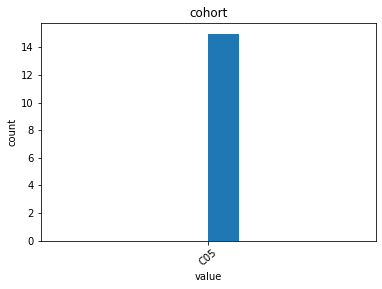

In [25]:
graph_columns = ['cohort']
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.xticks(rotation = 40)
    plt.hist(locomotor_all[col].dropna())
    plt.show() 

In [26]:
#need to calculate total for each rfid at each time
df_groups = locomotor_all.groupby([ 'rfid','cohort','cage_x','sex','locomotor_t1_experiment','locomotor_t1_time',
                                   'locomotor_t1_file_num','locomotor_t2_time','locomotor_t2_file_num',
                                   'locomotor_t2_experiment'],
                                  as_index = False)[['sample',
                                                     'locomotor_t1_total_distance',
                                                     'locomotor_t1_rest_time',
                                                     'locomotor_t1_rest_episode_count',
                                                     'locomotor_t1_movement_episode_count',
                                                     'locomotor_t1_vertical_activity_count',
                                                     'locomotor_t1_center_time_legacy',
                                                     'locomotor_t2_total_distance',
                                                     'locomotor_t2_rest_time',
                                                     'locomotor_t2_rest_episode_count',
                                                     'locomotor_t2_movement_episode_count',
                                                     'locomotor_t2_vertical_activity_count',
                                                     'locomotor_t2_center_time_legacy']].sum()
#print(locomotor_all.columns)
df_groups


,rfid,cohort,cage_x,sex,locomotor_t1_experiment,locomotor_t1_time,locomotor_t1_file_num,locomotor_t2_time,locomotor_t2_file_num,locomotor_t2_experiment,...,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,locomotor_t2_rest_time,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy


In [27]:
#unsure of why 4 rows are eliminated when using cage_y
#wait till we get the information back from suzanne mitchell on the missing file
#df_groups.loc[~(df_groups['cage_y'] == df_groups['cage_x'])]

In [28]:

#save locomotor file
#df_groups.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)
#df_groups.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/locomotor.csv', index=False)


In [29]:
list(df_groups.columns.values)

['rfid',
 'cohort',
 'cage_x',
 'sex',
 'locomotor_t1_experiment',
 'locomotor_t1_time',
 'locomotor_t1_file_num',
 'locomotor_t2_time',
 'locomotor_t2_file_num',
 'locomotor_t2_experiment',
 'sample',
 'locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']

In [30]:
graph_columns = ['locomotor_t1_total_distance',
 'locomotor_t1_rest_time',
 'locomotor_t1_rest_episode_count',
 'locomotor_t1_movement_episode_count',
 'locomotor_t1_vertical_activity_count',
 'locomotor_t1_center_time_legacy',
 'locomotor_t2_total_distance',
 'locomotor_t2_rest_time',
 'locomotor_t2_rest_episode_count',
 'locomotor_t2_movement_episode_count',
 'locomotor_t2_vertical_activity_count',
 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='cohort', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

ValueError: min() arg is an empty sequence

In [ ]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='cage_x', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cage_x',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

In [ ]:
graph_columns = ['locomotor_t1_total_distance',
                 'locomotor_t1_rest_time',
                 'locomotor_t1_rest_episode_count',
                 'locomotor_t1_movement_episode_count',
                 'locomotor_t1_vertical_activity_count',
                 'locomotor_t1_center_time_legacy',
                 'locomotor_t2_total_distance',
                 'locomotor_t2_rest_time',
                 'locomotor_t2_rest_episode_count',
                 'locomotor_t2_movement_episode_count',
                 'locomotor_t2_vertical_activity_count',
                 'locomotor_t2_center_time_legacy']
for col in graph_columns:
    sns.boxplot(y = col, x ='sex', 
                     data = df_groups, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df_groups, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()